**Standardization Vs Normalization- Feature Scaling**
*Normal = (X - X_min)/(X_max - X_min)*
Convert to Fixed scale (0-1) or (-1 ot 1)
Standard Scaling(Z score normalization):
    *stndrd = (X-Mean of the sample)/ Standard Deviation of sample*
    After Scaling - Mean will be 0 and SD=1

In [115]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from scipy import stats 
from scipy.stats import norm
from scipy.stats import bernoulli
import seaborn as sns


In [61]:

df = pd.read_csv('Wine.csv',usecols=["free.sulfur.dioxide","total.sulfur.dioxide","alcohol"])
df.head()

,free.sulfur.dioxide,total.sulfur.dioxide,alcohol
0,11.0,34.0,9.4
1,25.0,67.0,9.8
2,15.0,54.0,9.8
3,17.0,60.0,9.8
4,11.0,34.0,9.4


In [16]:
scaling = MinMaxScaler()
scaling.fit_transform(df[['free.sulfur.dioxide','total.sulfur.dioxide']])

array([[0.14084507, 0.09893993],
       [0.33802817, 0.2155477 ],
       [0.1971831 , 0.16961131],
       ...,
       [0.3943662 , 0.12014134],
       [0.43661972, 0.13427562],
       [0.23943662, 0.12720848]])

In [12]:
#Standard
scalingS = StandardScaler()
scalingS.fit_transform(df[['free.sulfur.dioxide','total.sulfur.dioxide']])

array([[-0.46619252, -0.37913269],
       [ 0.87263823,  0.62436323],
       [-0.08366945,  0.22904665],
       ...,
       [ 1.2551613 , -0.19667889],
       [ 1.54205361, -0.07504302],
       [ 0.20322286, -0.13586095]])

**P Value In Statistics**
Probability of Null Hypothesis to be True
p = 0.1 , means 10 out of 100 times the Null hypothesis will be true

In [34]:
r,p = stats.pearsonr(df.alcohol,df[['free.sulfur.dioxide']])
print(r,p) #P is the p value

[-0.06940835356499993] 0.005492313852321683


**Left Skewed And Right Skewed Distribution And Relation With Mean, Median And Mode**
Positive Skew = Mean > Median >Mode 
Symmetrical 
Negatice Skew = Mean < Median < Mode 

C:\Users\sudip\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alcohol', ylabel='Density'>

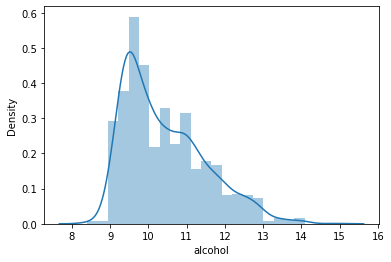

In [38]:
sns.distplot(df['alcohol'],hist=True)
#postive Skew


In [37]:
df['alcohol'].skew()

0.8608288068888538

In [50]:
df['pH'].skew()

0.19368349811284427

C:\Users\sudip\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pH', ylabel='Density'>

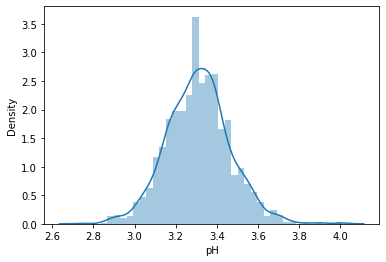

In [49]:
sns.distplot(df['pH'],hist=True)

**Confidence Intervals In Statistics**
Two limits = Lower limit and Upper Limit or Z-Critical Values

CI = x̄ ± zc(σ/√n) (+ for Upper, - For Lower)

In [55]:
norm.ppf(.95)
#(1-percantage)/2
#Z Critical

1.6448536269514722

**Bernoulli distribution- Mean, Variance And Standard Deviation OF Bernoulli distribution**
PMF, Probability Mass Function , P(X=x) = p^x * (1-p)^1-x
x will have 0 and 1
p(X=0)= (1-p)=q
p(X=1)= p       
In this distribution OUTCOME will be 0 or 1
MEAN, E(x) = p [Summation (i=0 to x) of x*p(x)]
Variance = p(1-p) = pq
SD= root(pq)


In [34]:
data_bern = bernoulli.rvs(size= 100, p =0.6) #10 random numbers where probabilty of success is .6
data_bern #more the soz is big the more the .6 probabilty of this gives success

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [37]:
np.mean(data_bern)
np.var(data_bern)
np.std(data_bern)

0.4898979485566356

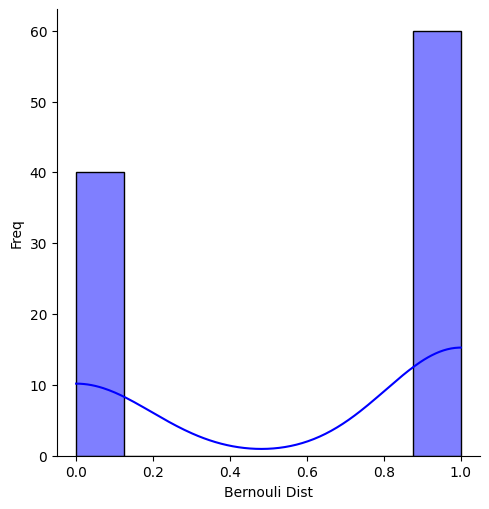

In [35]:
ax =sns.displot(data_bern,kde =True, color='blue')
ax.set(xlabel='Bernouli Dist',ylabel= 'Freq')

**5 Number Summary**
*Minimum*
*25%*
*Median*
*75%*
*Maximum*
Percentile = (x%/100)  *  (n+1)
The value will be the element index
E.G : 1,2,3,4,5,5,6,7,8,9,9,10
Here: *Minimum = 1*
*25% = 3* <=q2
*Median =6*
*75% = 9* <=q3
*Maximum =10*

In [54]:
dtset = [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10,200,220,6,7,4,1]

dd=sorted(dtset)
quantile1, quantile3= np.percentile(dd,[25,75])
print(quantile1,quantile3)
## Find the IQR
iqr_value=quantile3-quantile1
print("IQR:",iqr_value)

11.0 15.0
IQR: 4.0


In [40]:
lower_bound_val = quantile1 -(1.5 * iqr_value) 
upper_bound_val = quantile3 +(1.5 * iqr_value) 
print(lower_bound_val,upper_bound_val)

5.0 21.0


In [49]:
for i in dd:
    if(i<lower_bound_val or i>upper_bound_val):
        print("OutLiers: ",i)

OutLiers:  1
OutLiers:  4
OutLiers:  102
OutLiers:  107
OutLiers:  108
OutLiers:  200
OutLiers:  220


In [60]:
#Without Outliers

for i in dd:
    if(i>lower_bound_val and i<upper_bound_val):
        print(i)

6
7
10
10
10
10
10
11
11
12
12
12
12
12
12
12
13
13
13
13
14
14
14
14
14
14
15
15
15
15
15
17
19


**Different Type Of Sampling Techniques With Examples**
*Random Sampling: if  unequally represented*
*Stratified Sampling: Ratio of taking sample will be 1:1 or 50-50 if  equally represented*
*System Sampling: every n-th person i will see i will record statement*
*Cluster Sampling: Will Work based on Domain*
    Consider Ai Expert to pick up. Here AI is the domain. I will pick the people who have the domain of AI knowledge.


In [75]:
example = df 
example.sample(500,replace=False) # taking 500 sample of rows from 1599 rows

,free.sulfur.dioxide,total.sulfur.dioxide,alcohol
755,22.0,47.0,10.7
222,5.0,10.0,9.5
271,4.0,23.0,10.1
339,12.0,29.0,9.8
247,11.0,73.0,9.3
...,...,...,...
1033,14.0,27.0,10.4
166,18.0,101.0,10.2
689,5.0,17.0,9.4
601,12.0,35.0,9.0


**Z Score And Its Applications**
How far the value is from the mean in terms of STD
the value of Z represents the value-th STD
This helps to cmobine scores between Distributions
Higher z score defines better.


In [104]:
df_ht = pd.read_csv("weight-height.csv")
df_ht['Zscore'] = ( df_ht.Height - df_ht.Height.mean() ) / df_ht.Height.std()
df_ht.head(5)


,Gender,Height,Weight,Zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [97]:
df_ht[df_ht['Zscore']>3]


,Gender,Height,Weight,Zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [108]:
df_ht[(df_ht.Zscore<-3) | (df_ht.Zscore>3)]

,Gender,Height,Weight,Zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [102]:
df_no_outliers = df_ht[(df_ht.Zscore>-3) & (df_ht.Zscore<3)]
df_no_outliers.shape

(9993, 4)

**Power Law Distribution**
80-20% rule
e.g. 
    80% sales coming from 20% of product. Where % of sale in Y axis and Overall Product in X axis
    
The height of the pareto distribution is based on the value of alpha. and if alpha is high the height is also high